<a href="https://colab.research.google.com/github/Vakhranev/MDB/blob/main/%D0%93%D1%80%D0%B0%D1%84%D0%B8%D0%BA%20%D0%B2%20%D1%87%D1%91%D1%80%D0%BD%D0%BE-%D0%B1%D0%B5%D0%BB%D0%BE%D0%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

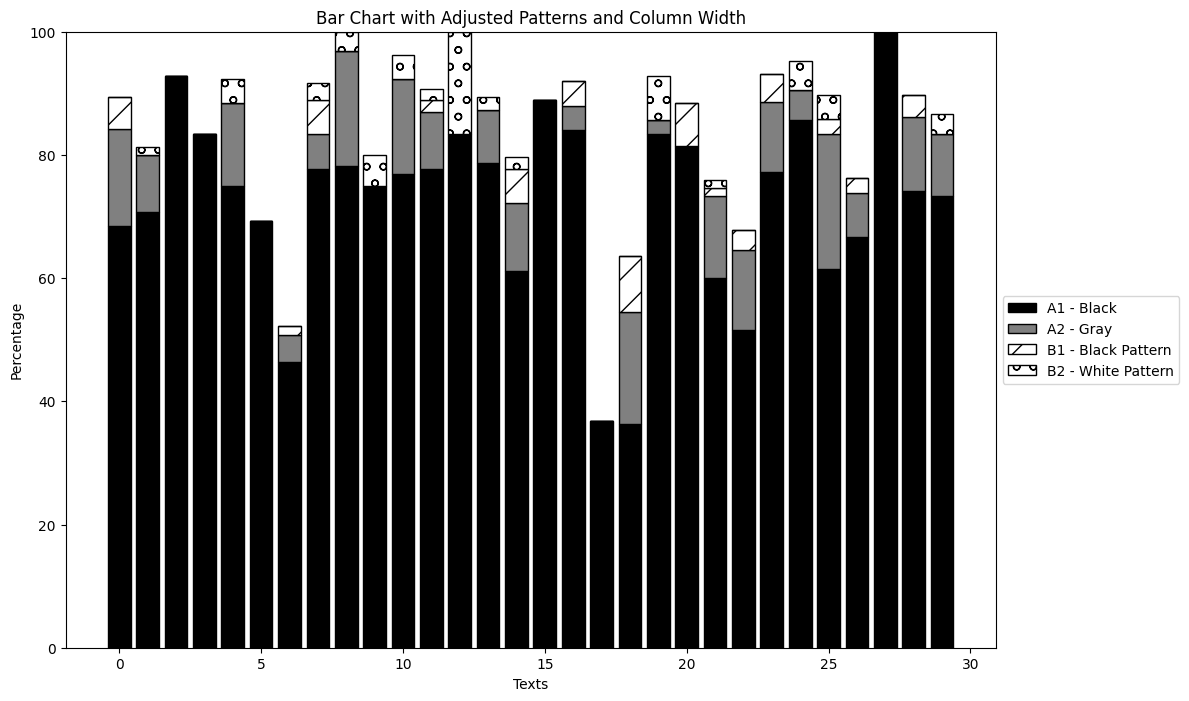

In [2]:
import glob
import os
import random
from pymystem3 import Mystem
import string
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.patches as mpatches

mystem = Mystem()

# folder path с текстами учеников
students_path = r"/content/Students_texts/A1"
text_contents = {}

# Получаем все файлы
all_files = glob.glob(students_path + "/*.txt")

# Выбираем случайные 30 файлов
random_files = random.sample(all_files, 30)

# тут будет количество уникальных лемм
x_data = []

# Обрабатываем только выбранные файлы
for text_path in random_files:
    with open(text_path, "r", encoding='utf-8') as file:
        file_name = os.path.basename(text_path)  # Ключи тут являются названиями файлов текстов
        text = file.read()
        lemmas = [lemma for lemma in mystem.lemmatize(text)
                  if lemma.strip() and not all(c in string.punctuation or c.isspace() for c in lemma)  # убираем знаки препинания
                  and not any(c.isalpha() and ord(c) < 128 for c in lemma)]  # убираем леммы без кириллицы
        lemmas = list(set(lemmas))  # Оставляем только уникальные леммы
        x_data.append(len(lemmas))  # записываем количество уникальных лемм каждого текста
        text_contents[file_name] = lemmas

# Загружаем частотный словарь для каждой тысячи слов
df = pd.read_csv('ru_m3.csv', sep=';')
df.index = np.arange(1, len(df) + 1)
df = df[['Lemma', 'CEFR']]
mark1 = "a1"
mark2 = "a2"
mark3 = "b1"
mark4 = "b2"
mark5 = "A1"
mark6 = "A2"
mark7 = "B1"
mark8 = "B2"
dc1 = df.query('CEFR == @mark1 | CEFR == @mark5')
dc2 = df.query('CEFR == @mark2 | CEFR == @mark6')
dc3 = df.query('CEFR == @mark3 | CEFR == @mark7')
dc4 = df.query('CEFR == @mark4 | CEFR == @mark8')

# Создаём списки для каждого уровня CEFR
slovar1 = list(set(dc1['Lemma']))
slovar2 = list(set(dc2['Lemma']))
slovar3 = list(set(dc3['Lemma']))
slovar4 = list(set(dc4['Lemma']))

# Matching lemmas для каждого уровня
y_data_1 = []
y_data_2 = []
y_data_3 = []
y_data_4 = []

for file_name, lines in text_contents.items():
    lv1 = 0
    lv2 = 0
    lv3 = 0
    lv4 = 0
    for i in lines:
        if i in slovar1:
            lv1 += 1
        if i in slovar2:
            lv2 += 1
        if i in slovar3:
            lv3 += 1
        if i in slovar4:
            lv4 += 1
    y_data_1.append(lv1)
    y_data_2.append(lv2)
    y_data_3.append(lv3)
    y_data_4.append(lv4)

# Unmatched lemmas
y_data_5 = []

for i in range(len(y_data_1)):
    diff = x_data[i] - y_data_1[i] - y_data_2[i] - y_data_3[i] - y_data_4[i]
    y_data_5.append(diff)

info = list(text_contents.keys())
info_n = [i for i in range(len(info))]  # Заменяем имена на цифры для bar graph

percentages_1 = [y / x * 100 for y, x in zip(y_data_1, x_data)]
percentages_2 = [y / x * 100 for y, x in zip(y_data_2, x_data)]
percentages_3 = [y / x * 100 for y, x in zip(y_data_3, x_data)]
percentages_4 = [y / x * 100 for y, x in zip(y_data_4, x_data)]
percentages_5 = [y / x * 100 for y, x in zip(y_data_5, x_data)]

# Ширина столбцов увеличена
bar_width = 0.8

# Увеличиваем размер фигуры
plt.figure(figsize=(12, 8))

# Задаем новые контрастные паттерны
plt.bar(info_n, percentages_1, color='black', edgecolor='black', width=bar_width)  # Полностью черный
plt.bar(info_n, percentages_2, bottom=percentages_1, color='gray', edgecolor='black', width=bar_width)  # Серая заливка
plt.bar(info_n, percentages_3, bottom=np.add(percentages_1, percentages_2), color='white', edgecolor='black', hatch='/', width=bar_width)  # Черный паттерн
plt.bar(info_n, percentages_4, bottom=np.add(np.add(percentages_1, percentages_2), percentages_3), color='white', edgecolor='black', hatch='o', width=bar_width)  # Белый паттерн

# Легенда с пояснениями
legend_labels = ['A1 - Black', 'A2 - Gray', 'B1 - Black Pattern', 'B2 - White Pattern']
patches = [mpatches.Patch(facecolor=color, edgecolor='black', hatch=pattern, label=legend_labels[i])
           for i, (color, pattern) in enumerate([('black', ''), ('gray', ''), ('white', '/'), ('white', 'o')])]

plt.legend(handles=patches, loc='center left', bbox_to_anchor=(1, 0.5))

# Настройки для осей
plt.xlabel('Texts')
plt.ylabel('Percentage')
plt.title('Bar Chart with Adjusted Patterns and Column Width')

# Отображаем график
plt.show()

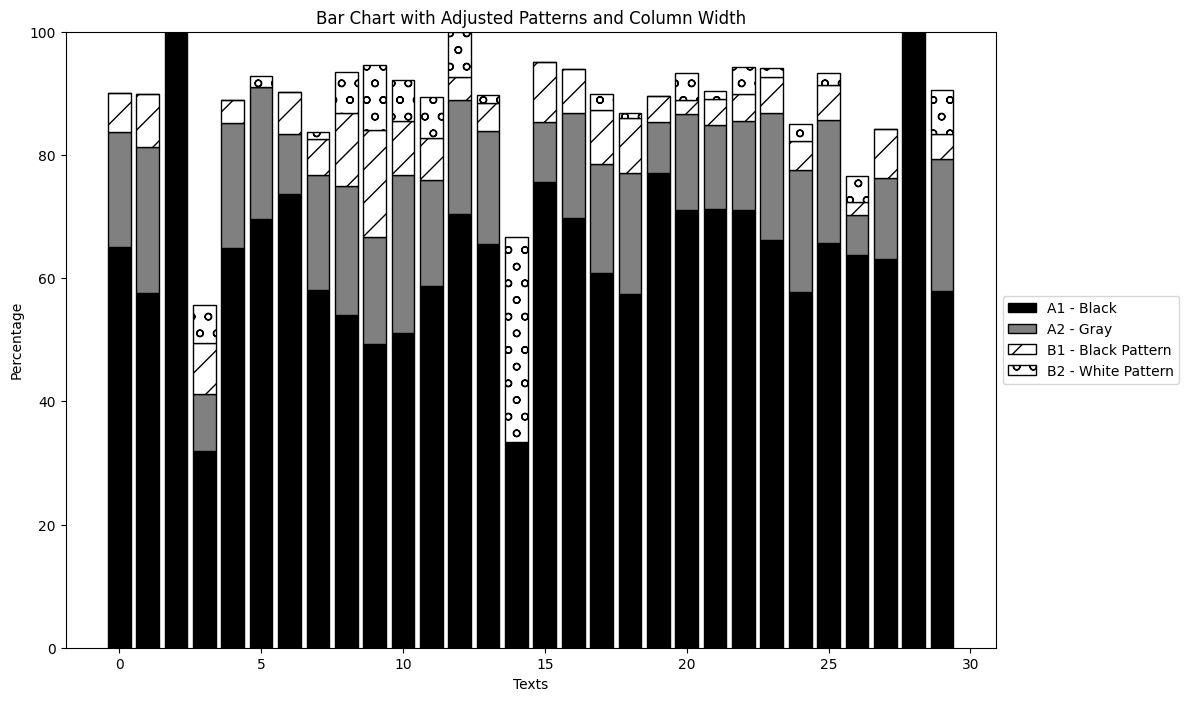

In [4]:
# folder path с текстами учеников
students_path = r"/content/Students_texts/A2"
text_contents = {}

# Получаем все файлы
all_files = glob.glob(students_path + "/*.txt")

# Выбираем случайные 30 файлов
random_files = random.sample(all_files, 30)

# тут будет количество уникальных лемм
x_data = []

# Обрабатываем только выбранные файлы
for text_path in random_files:
    with open(text_path, "r", encoding='utf-8') as file:
        file_name = os.path.basename(text_path)  # Ключи тут являются названиями файлов текстов
        text = file.read()
        lemmas = [lemma for lemma in mystem.lemmatize(text)
                  if lemma.strip() and not all(c in string.punctuation or c.isspace() for c in lemma)  # убираем знаки препинания
                  and not any(c.isalpha() and ord(c) < 128 for c in lemma)]  # убираем леммы без кириллицы
        lemmas = list(set(lemmas))  # Оставляем только уникальные леммы
        x_data.append(len(lemmas))  # записываем количество уникальных лемм каждого текста
        text_contents[file_name] = lemmas

# Matching lemmas для каждого уровня
y_data_1 = []
y_data_2 = []
y_data_3 = []
y_data_4 = []

for file_name, lines in text_contents.items():
    lv1 = 0
    lv2 = 0
    lv3 = 0
    lv4 = 0
    for i in lines:
        if i in slovar1:
            lv1 += 1
        if i in slovar2:
            lv2 += 1
        if i in slovar3:
            lv3 += 1
        if i in slovar4:
            lv4 += 1
    y_data_1.append(lv1)
    y_data_2.append(lv2)
    y_data_3.append(lv3)
    y_data_4.append(lv4)

# Unmatched lemmas
y_data_5 = []

for i in range(len(y_data_1)):
    diff = x_data[i] - y_data_1[i] - y_data_2[i] - y_data_3[i] - y_data_4[i]
    y_data_5.append(diff)

info = list(text_contents.keys())
info_n = [i for i in range(len(info))]  # Заменяем имена на цифры для bar graph

percentages_1 = [y / x * 100 for y, x in zip(y_data_1, x_data)]
percentages_2 = [y / x * 100 for y, x in zip(y_data_2, x_data)]
percentages_3 = [y / x * 100 for y, x in zip(y_data_3, x_data)]
percentages_4 = [y / x * 100 for y, x in zip(y_data_4, x_data)]
percentages_5 = [y / x * 100 for y, x in zip(y_data_5, x_data)]

# Ширина столбцов увеличена
bar_width = 0.8

# Увеличиваем размер фигуры
plt.figure(figsize=(12, 8))

# Задаем новые контрастные паттерны
plt.bar(info_n, percentages_1, color='black', edgecolor='black', width=bar_width)  # Полностью черный
plt.bar(info_n, percentages_2, bottom=percentages_1, color='gray', edgecolor='black', width=bar_width)  # Серая заливка
plt.bar(info_n, percentages_3, bottom=np.add(percentages_1, percentages_2), color='white', edgecolor='black', hatch='/', width=bar_width)  # Черный паттерн
plt.bar(info_n, percentages_4, bottom=np.add(np.add(percentages_1, percentages_2), percentages_3), color='white', edgecolor='black', hatch='o', width=bar_width)  # Белый паттерн

# Легенда с пояснениями
legend_labels = ['A1 - Black', 'A2 - Gray', 'B1 - Black Pattern', 'B2 - White Pattern']
patches = [mpatches.Patch(facecolor=color, edgecolor='black', hatch=pattern, label=legend_labels[i])
           for i, (color, pattern) in enumerate([('black', ''), ('gray', ''), ('white', '/'), ('white', 'o')])]

plt.legend(handles=patches, loc='center left', bbox_to_anchor=(1, 0.5))

# Настройки для осей
plt.xlabel('Texts')
plt.ylabel('Percentage')
plt.title('Bar Chart with Adjusted Patterns and Column Width')

# Отображаем график
plt.show()

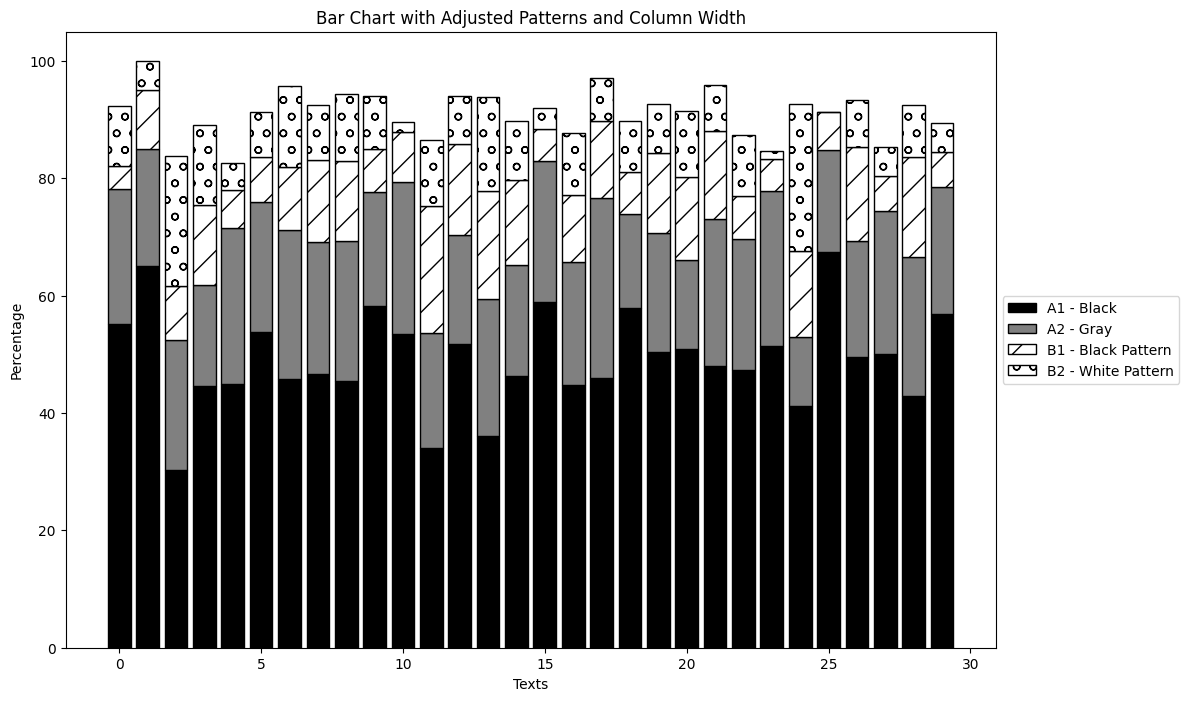

In [5]:
# folder path с текстами учеников
students_path = r"/content/Students_texts/B1"
text_contents = {}

# Получаем все файлы
all_files = glob.glob(students_path + "/*.txt")

# Выбираем случайные 30 файлов
random_files = random.sample(all_files, 30)

# тут будет количество уникальных лемм
x_data = []

# Обрабатываем только выбранные файлы
for text_path in random_files:
    with open(text_path, "r", encoding='utf-8') as file:
        file_name = os.path.basename(text_path)  # Ключи тут являются названиями файлов текстов
        text = file.read()
        lemmas = [lemma for lemma in mystem.lemmatize(text)
                  if lemma.strip() and not all(c in string.punctuation or c.isspace() for c in lemma)  # убираем знаки препинания
                  and not any(c.isalpha() and ord(c) < 128 for c in lemma)]  # убираем леммы без кириллицы
        lemmas = list(set(lemmas))  # Оставляем только уникальные леммы
        x_data.append(len(lemmas))  # записываем количество уникальных лемм каждого текста
        text_contents[file_name] = lemmas

# Matching lemmas для каждого уровня
y_data_1 = []
y_data_2 = []
y_data_3 = []
y_data_4 = []

for file_name, lines in text_contents.items():
    lv1 = 0
    lv2 = 0
    lv3 = 0
    lv4 = 0
    for i in lines:
        if i in slovar1:
            lv1 += 1
        if i in slovar2:
            lv2 += 1
        if i in slovar3:
            lv3 += 1
        if i in slovar4:
            lv4 += 1
    y_data_1.append(lv1)
    y_data_2.append(lv2)
    y_data_3.append(lv3)
    y_data_4.append(lv4)

# Unmatched lemmas
y_data_5 = []

for i in range(len(y_data_1)):
    diff = x_data[i] - y_data_1[i] - y_data_2[i] - y_data_3[i] - y_data_4[i]
    y_data_5.append(diff)

info = list(text_contents.keys())
info_n = [i for i in range(len(info))]  # Заменяем имена на цифры для bar graph

percentages_1 = [y / x * 100 for y, x in zip(y_data_1, x_data)]
percentages_2 = [y / x * 100 for y, x in zip(y_data_2, x_data)]
percentages_3 = [y / x * 100 for y, x in zip(y_data_3, x_data)]
percentages_4 = [y / x * 100 for y, x in zip(y_data_4, x_data)]
percentages_5 = [y / x * 100 for y, x in zip(y_data_5, x_data)]

# Ширина столбцов увеличена
bar_width = 0.8

# Увеличиваем размер фигуры
plt.figure(figsize=(12, 8))

# Задаем новые контрастные паттерны
plt.bar(info_n, percentages_1, color='black', edgecolor='black', width=bar_width)  # Полностью черный
plt.bar(info_n, percentages_2, bottom=percentages_1, color='gray', edgecolor='black', width=bar_width)  # Серая заливка
plt.bar(info_n, percentages_3, bottom=np.add(percentages_1, percentages_2), color='white', edgecolor='black', hatch='/', width=bar_width)  # Черный паттерн
plt.bar(info_n, percentages_4, bottom=np.add(np.add(percentages_1, percentages_2), percentages_3), color='white', edgecolor='black', hatch='o', width=bar_width)  # Белый паттерн

# Легенда с пояснениями
legend_labels = ['A1 - Black', 'A2 - Gray', 'B1 - Black Pattern', 'B2 - White Pattern']
patches = [mpatches.Patch(facecolor=color, edgecolor='black', hatch=pattern, label=legend_labels[i])
           for i, (color, pattern) in enumerate([('black', ''), ('gray', ''), ('white', '/'), ('white', 'o')])]

plt.legend(handles=patches, loc='center left', bbox_to_anchor=(1, 0.5))

# Настройки для осей
plt.xlabel('Texts')
plt.ylabel('Percentage')
plt.title('Bar Chart with Adjusted Patterns and Column Width')

# Отображаем график
plt.show()

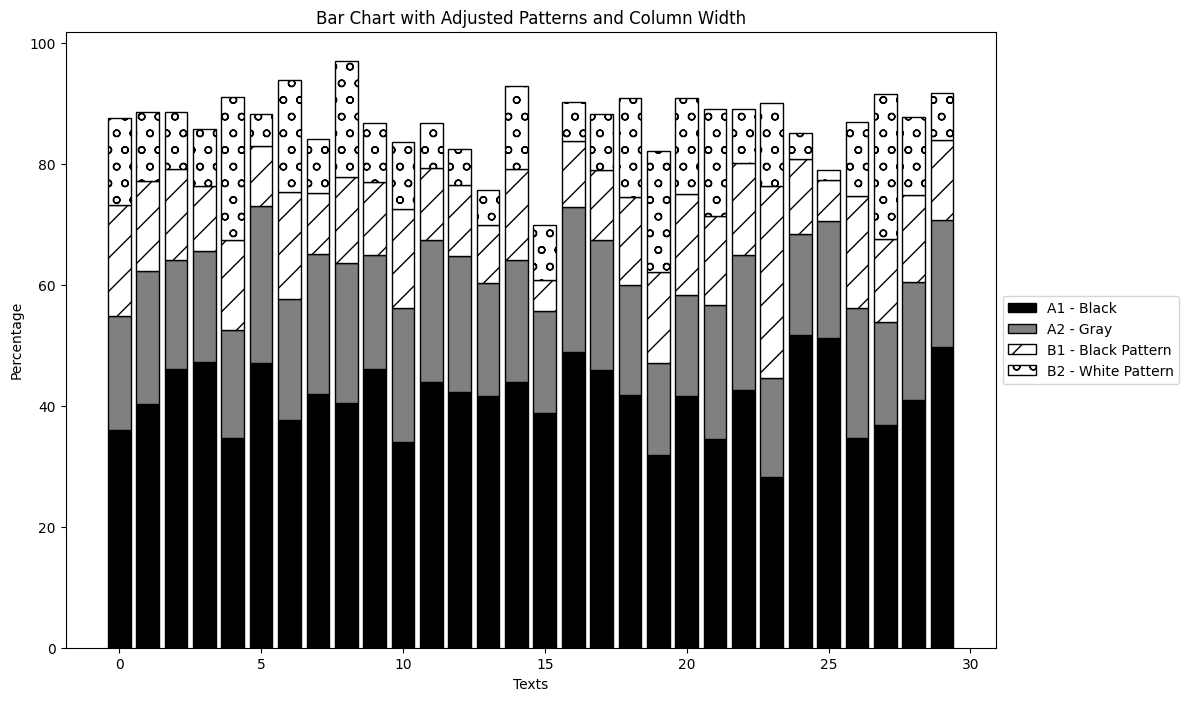

In [6]:
# folder path с текстами учеников
students_path = r"/content/Students_texts/B2"
text_contents = {}

# Получаем все файлы
all_files = glob.glob(students_path + "/*.txt")

# Выбираем случайные 30 файлов
random_files = random.sample(all_files, 30)

# тут будет количество уникальных лемм
x_data = []

# Обрабатываем только выбранные файлы
for text_path in random_files:
    with open(text_path, "r", encoding='utf-8') as file:
        file_name = os.path.basename(text_path)  # Ключи тут являются названиями файлов текстов
        text = file.read()
        lemmas = [lemma for lemma in mystem.lemmatize(text)
                  if lemma.strip() and not all(c in string.punctuation or c.isspace() for c in lemma)  # убираем знаки препинания
                  and not any(c.isalpha() and ord(c) < 128 for c in lemma)]  # убираем леммы без кириллицы
        lemmas = list(set(lemmas))  # Оставляем только уникальные леммы
        x_data.append(len(lemmas))  # записываем количество уникальных лемм каждого текста
        text_contents[file_name] = lemmas

# Matching lemmas для каждого уровня
y_data_1 = []
y_data_2 = []
y_data_3 = []
y_data_4 = []

for file_name, lines in text_contents.items():
    lv1 = 0
    lv2 = 0
    lv3 = 0
    lv4 = 0
    for i in lines:
        if i in slovar1:
            lv1 += 1
        if i in slovar2:
            lv2 += 1
        if i in slovar3:
            lv3 += 1
        if i in slovar4:
            lv4 += 1
    y_data_1.append(lv1)
    y_data_2.append(lv2)
    y_data_3.append(lv3)
    y_data_4.append(lv4)

# Unmatched lemmas
y_data_5 = []

for i in range(len(y_data_1)):
    diff = x_data[i] - y_data_1[i] - y_data_2[i] - y_data_3[i] - y_data_4[i]
    y_data_5.append(diff)

info = list(text_contents.keys())
info_n = [i for i in range(len(info))]  # Заменяем имена на цифры для bar graph

percentages_1 = [y / x * 100 for y, x in zip(y_data_1, x_data)]
percentages_2 = [y / x * 100 for y, x in zip(y_data_2, x_data)]
percentages_3 = [y / x * 100 for y, x in zip(y_data_3, x_data)]
percentages_4 = [y / x * 100 for y, x in zip(y_data_4, x_data)]
percentages_5 = [y / x * 100 for y, x in zip(y_data_5, x_data)]

# Ширина столбцов увеличена
bar_width = 0.8

# Увеличиваем размер фигуры
plt.figure(figsize=(12, 8))

# Задаем новые контрастные паттерны
plt.bar(info_n, percentages_1, color='black', edgecolor='black', width=bar_width)  # Полностью черный
plt.bar(info_n, percentages_2, bottom=percentages_1, color='gray', edgecolor='black', width=bar_width)  # Серая заливка
plt.bar(info_n, percentages_3, bottom=np.add(percentages_1, percentages_2), color='white', edgecolor='black', hatch='/', width=bar_width)  # Черный паттерн
plt.bar(info_n, percentages_4, bottom=np.add(np.add(percentages_1, percentages_2), percentages_3), color='white', edgecolor='black', hatch='o', width=bar_width)  # Белый паттерн

# Легенда с пояснениями
legend_labels = ['A1 - Black', 'A2 - Gray', 'B1 - Black Pattern', 'B2 - White Pattern']
patches = [mpatches.Patch(facecolor=color, edgecolor='black', hatch=pattern, label=legend_labels[i])
           for i, (color, pattern) in enumerate([('black', ''), ('gray', ''), ('white', '/'), ('white', 'o')])]

plt.legend(handles=patches, loc='center left', bbox_to_anchor=(1, 0.5))

# Настройки для осей
plt.xlabel('Texts')
plt.ylabel('Percentage')
plt.title('Bar Chart with Adjusted Patterns and Column Width')

# Отображаем график
plt.show()